<a href="https://colab.research.google.com/github/yum-cloud-94/CAPTCHA-BREAK-AI/blob/Image-preprocessing/captcha_image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pytesseract
import os
import errno
from time import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import tempfile
from PIL import Image
import PIL

# directory remove
import shutil

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

In [ ]:
# dh_dir = 'C:/Users/admin/Desktop/captcha/'
kaggle_dir='C:/Users/admin/Desktop/captcha/kaggle/'
captcha_3000_dir='C:/Users/admin/Desktop/captcha/captcha_3000/'
claptcha_3000_dir='C:/Users/admin/Desktop/captcha/claptcha_3000/'
testcaptcha_dir='C:/Users/admin/Desktop/captcha/testcaptcha/'

captcha_dir='C:/Users/admin/Desktop/captcha/captcha/'
claptcha_dir='C:/Users/admin/Desktop/captcha/claptcha/'

os.chdir(testcaptcha_dir)

image_list=os.listdir(testcaptcha_dir)


In [ ]:
# 이미지 읽어오기
def read(idx,gray=0,show=True):
    global image_list
    img=cv2.imread(image_list[idx],gray)
    if show==True:
        plt.imshow(img)
    return img


# Gaussianblur
def blur(img,tmp,show=True):
    img_blur=cv2.GaussianBlur(img,(tmp,tmp),0)
    if show==True:
        plt.imshow(img_blur)
    return img_blur
    
# adaptive 이진화
def adap_thres(img,show=True):
    th=cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY, 3, 2)
    if show==True:
        plt.imshow(th)
    return th


# 커널 만들어 주는 함수
def make_kernel(tmp,row,col):
    if tmp==0:
        kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(row,col))
    elif tmp==1:
        kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(row,col))
    else:
        kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(row,col))
    return kernel
    

def thresh(img,tmp=180,show=True):
    th=cv2.threshold(img,tmp,255,cv2.THRESH_BINARY)[1]
    if show==True:
        plt.imshow(th)
    return th
    
# otsu 이진화
def otsu_thres(img,show=True):
    th=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    if show==True:
        plt.imshow(th)
    return th


# erosion 연산
def eros(img,kernel,cnt=1,show=True):
    ero=cv2.erode(img,kernel,iterations=cnt)
    if show==True:
        plt.imshow(ero)
    return ero

# dilataion 연산
def dil(img,kernel,cnt=1,show=True):
    dila=cv2.dilate(img,kernel,iterations=cnt)
    if show==True:
        plt.imshow(dila)
    return dila


# 모폴로지 연산(open,close,gradient)
def morph(img,kernel,tmp='open',show=True):
    if tmp=='open':
        result=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
    elif tmp=='close':
        result=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
    elif tmp=='grad':
        result=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
            
    if show==True:
        plt.imshow(result)
    return result

def tess_result(img):
    result=pytesseract.image_to_string(img,
                                       config='--psm 8 oem 3-c tessdit_char_whitelist 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
                                      lang='eng')
    return result



In [ ]:
# 여러개 plot 보기
def my_plot(titles,images):
    for i in range(len(titles)):
        plt.subplot(len(titles)/2,2,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

In [ ]:
def read(idx,gray=0,show=True):
    global image_list
    img=cv2.imread(image_list[idx],gray)
    if show==True:
        plt.imshow(img)
    return img

In [ ]:
# read(idx,gray=0,show=True)
# blur(img,tmp,show=True)
# make_kernel(tmp,row,col)
# adap_thres(img,show=True)
# otsu_thres(img,show=True)
# eros(img,kernel,cnt=1,show=True)
# dil(img,kernel,cnt=1,show=True)
# morph(img,kernel,tmp='open',show=True)

In [ ]:
dil_kernel=make_kernel(0,1,2)
eros_kernel=make_kernel(0,3,3)
open_kernel=make_kernel(0,3,3)
close_kernel=make_kernel(0,3,3)
grad_kernel=make_kernel(0,2,2)


In [ ]:
img=read(212,0,False)
blur_img=blur(img,5,False)
adap_img=adap_thres(img,False)
otsu_img=otsu_thres(img,False)
eros_img=eros(img,eros_kernel,cnt=1,show=False)
dil_img=dil(img,dil_kernel,cnt=1,show=False)
open_img=morph(img,open_kernel,'open',False)
close_img=morph(img,close_kernel,'close',False)
grad_img=morph(img,grad_kernel,'grad',False)


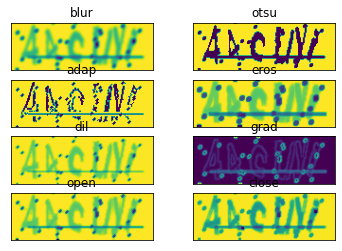

In [ ]:
titles=['blur','otsu','adap','eros','dil','grad','open','close']
images=[blur_img,otsu_img,adap_img,eros_img,dil_img,
       grad_img,open_img,close_img]


my_plot(titles,images)


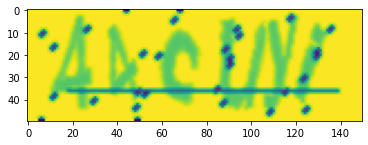

In [ ]:
plt.imshow(img)

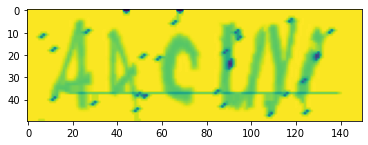

In [ ]:
dil_img=dil(img,dil_kernel,2,True)

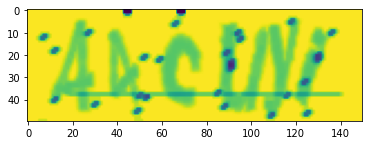

In [ ]:
eros_dil_img=eros(dil_img,grad_kernel,1,True)

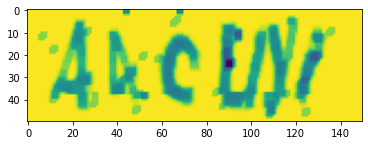

In [ ]:
close_dil_img=morph(dil_img,open_kernel,'close',True)

In [ ]:
def image_preprocessing(img,iscaptcha=True):
    if iscaptcha==True:
        img=dil(img,dil_kernel,3,False)
        img=morph(img,close_kernel,'close',False)
    else:
        img=dil(img,dil_kernel,2,False)
    return img

In [ ]:
def make_data(dir_name,iscaptcha=True):
    global image_list
    new_dir=dir_name+'/'
    
    try:
        if not os.path.isdir(dir_name):
            os.makedirs(os.path.join(dir_name))
    except OSError as e:
        if e.errno !=errno.EEXIST:
            print("Failed to create directory!!!!!")    
    
    for i in range(len(image_list)):
        img=read(i,1,False)
        img=image_preprocessing(img,iscaptcha)
        cv2.imwrite(new_dir+image_list[i],img)

    
    

In [ ]:
make_data('newtestcaptcha',True)

In [ ]:
os.getcwd()

'C:\\Users\\admin\\Desktop\\captcha\\captcha'

In [ ]:
def char_dist(image_list):
    dic={}
    for img in image_list:
        label=img.split('.')[0]
        for char in label:
            if char in dic.keys():
                dic[char]=dic[char]+1
            else:
                dic[char]=1
    return dic

In [ ]:
dic=char_dist(image_list)

In [ ]:
for key,value in dic.items():
    print(key,':',value)

0 : 1770
1 : 1703
j : 1674
d : 1685
x : 1602
7 : 1653
i : 1681
u : 1625
e : 1730
9 : 1764
k : 1674
g : 1663
c : 1718
5 : 1628
4 : 1728
f : 1660
n : 1693
2 : 1645
t : 1644
3 : 1604
o : 1703
h : 1686
y : 1592
q : 1697
s : 1652
p : 1697
z : 1663
a : 1614
r : 1646
m : 1627
l : 1672
b : 1676
w : 1578
8 : 1678
6 : 1640
v : 1645


In [ ]:
label='13evdsgr'


'zzpzk7'

# character detection

In [ ]:
import pickle
from itertools import product, repeat, permutations, combinations_with_replacement, chain
from math import floor, ceil

warnings.filterwarnings('ignore')

%matplotlib inline

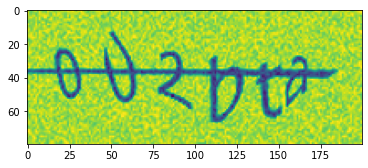

In [ ]:
img=read(0,0,True)

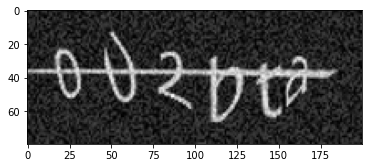

In [ ]:
inverted = 255 - img
plt.imshow(inverted, cmap='gray');

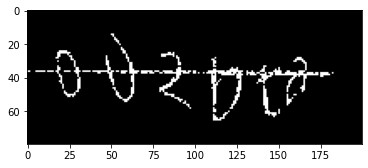

In [ ]:
ret, thresholded = cv.threshold(inverted, 140, 255, cv.THRESH_BINARY)
plt.imshow(thresholded, cmap='gray')

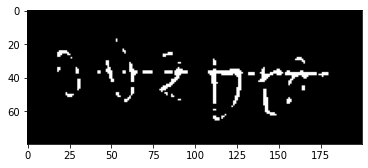

In [ ]:
blurred = cv.medianBlur(thresholded, 3)
plt.imshow(blurred, cmap='gray');

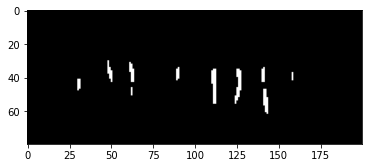

In [ ]:
    kernel = np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
    ]).astype(np.uint8)
    
    ex = cv.morphologyEx(blurred, cv.MORPH_OPEN, kernel)
    plt.imshow(ex, cmap='gray');

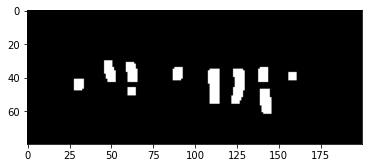

In [ ]:
kernel2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
]).astype(np.uint8)
ex2 = cv.morphologyEx(ex, cv.MORPH_DILATE, kernel2)
plt.imshow(ex2, cmap='gray');

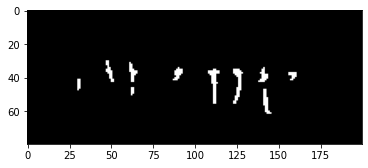

In [ ]:
mask = ex2
processed = cv.bitwise_and(mask, blurred)
plt.imshow(processed, cmap='gray');

In [ ]:
processed=cv2.cvtColor(processed,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
contours, hierachy = cv.findContours(processed, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
contours = [contours[k] for k in range(0, len(contours)) if hierachy[0, k, 3] == -1]
contours.sort(key=lambda cnt: cv.boundingRect(cnt)[0])

In [ ]:
len(contours)

10

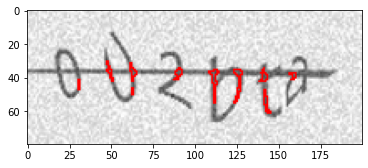

In [ ]:
plt.imshow(cv2.drawContours(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), contours, -1, (255, 0, 0), 1, cv2.LINE_4));

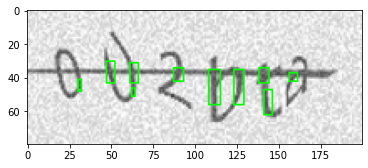

In [ ]:
contour_bboxes = [cv.boundingRect(contour) for contour in contours]
img_bboxes = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
for bbox in contour_bboxes:
    left, top, width, height = bbox
    img_bboxes = cv.rectangle(img_bboxes,
                              (left, top), (left+width, top+height),
                              (0, 255, 0), 1)
plt.imshow(img_bboxes, cmap='gray');